Epoch 1/100


/home/kamin/Documents/CPE 232 Project/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0158
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 4.0176e-04
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.9267e-04
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 5.0375e-04
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.0144e-04
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 4.4676e-04
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 4.0956e-04
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.5039e-04
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.3835e-04
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.5956e-04
Epoch 11/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 3.3729e-04
Epoch 12/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 3.2569e-04
Epoch 13/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 2.7039e-04
Epoch 14/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.9739e-04
Epoch 15/100
77/7

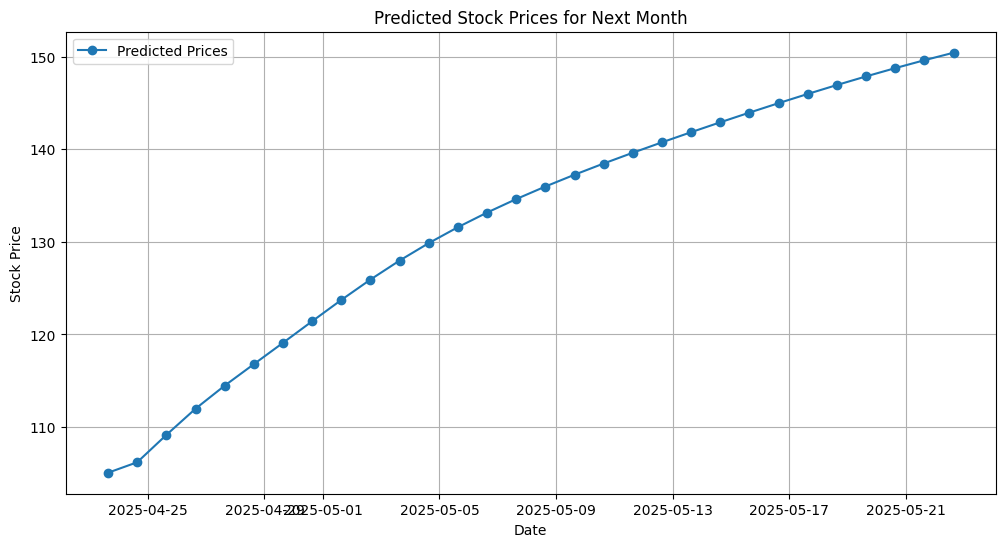

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    return df

# Prepare data for LSTM model
def prepare_data(df, feature='Close', look_back=60):
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(df[[feature]])
    
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    
    return np.array(X), np.array(y), scaler

# Build LSTM model
def build_model(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train and predict
def train_and_predict(file_path, days_to_predict=30):
    df = load_data(file_path)
    X, y, scaler = prepare_data(df)
    X_train, X_test = X[:-1], X[-1:]
    y_train, y_test = y[:-1], y[-1:]
    
    model = build_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
    
    predictions = []
    current_input = X_test
    for _ in range(days_to_predict):
        prediction = model.predict(current_input)
        predictions.append(prediction[0][0])
        new_input = np.append(current_input[:, 1:, :], prediction.reshape(1, 1, 1), axis=1)
        current_input = new_input
    
    return scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Example usage
file_path = '/home/kamin/Documents/CPE 232 Project/sp500_data/NVDA.csv'  # Replace with your actual CSV file
predicted_prices = train_and_predict(file_path)

# Plot results
future_dates = pd.date_range(start=pd.to_datetime("today"), periods=len(predicted_prices), freq='D')
plt.figure(figsize=(12, 6))
plt.plot(future_dates, predicted_prices, marker='o', linestyle='-', label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Predicted Stock Prices for Next Month')
plt.legend()
plt.grid()
plt.show()

# Save the model
import pickle
with open('stock_price_model.pkl', 'wb') as f:
    pickle.dump(predicted_prices, f)


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2025-04-23 15:57:57.581138: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 15:57:57.658671: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-23 15:57:57.712764: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745398677.775419    7319 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745398677.793956    7319 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745398677.916667    7319 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Num GPUs Available:  0


2025-04-23 15:58:01.935029: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
